In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.svm import SVC
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
# from sklearn.grid_search import GridSearchCV   #Perforing grid search
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from matplotlib import pyplot as plt
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn import preprocessing
from sklearn.model_selection import ShuffleSplit

In [67]:
df= pd.read_csv('adult.csv')

In [68]:
df[df == '?'] = np.nan

C:\Users\harki\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [69]:
df['income'] = df['income'].map({'<=50K':0, '>50K':1})
df = df.dropna()


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
age               30162 non-null int64
workclass         30162 non-null object
fnlwgt            30162 non-null int64
education         30162 non-null object
education.num     30162 non-null int64
marital.status    30162 non-null object
occupation        30162 non-null object
relationship      30162 non-null object
race              30162 non-null object
sex               30162 non-null object
capital.gain      30162 non-null int64
capital.loss      30162 non-null int64
hours.per.week    30162 non-null int64
native.country    30162 non-null object
income            30162 non-null int64
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


In [22]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238,0.248922
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984,0.432396
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [49]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,0
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,0
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0


# Understanding the features

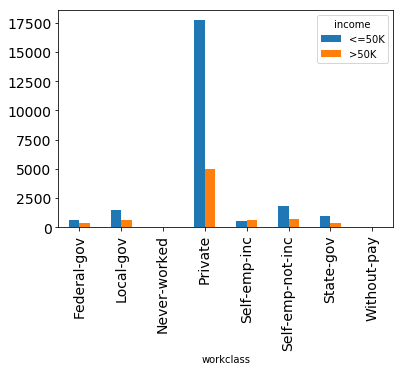

In [20]:
df.groupby(["income","workclass"]).size().unstack("income").plot(kind="bar",fontsize=14)


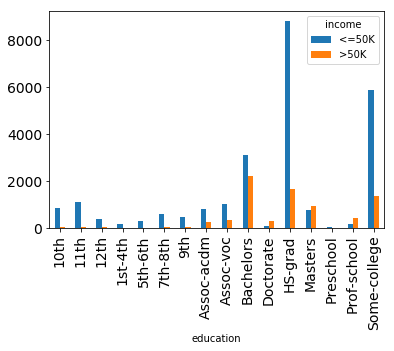

In [21]:
df.groupby(["income","education"]).size().unstack("income").plot(kind="bar",fontsize=14)


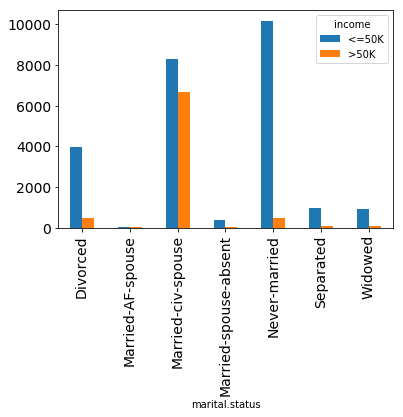

In [22]:
df.groupby(["income","marital.status"]).size().unstack("income").plot(kind="bar",fontsize=14)


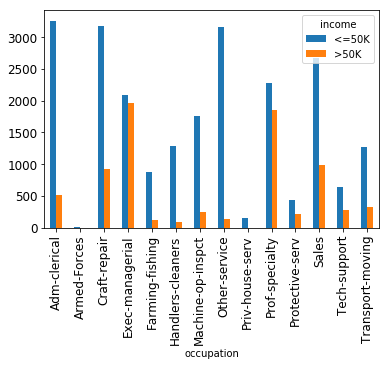

In [23]:
df.groupby(["income","occupation"]).size().unstack("income").plot(kind="bar",fontsize=12)


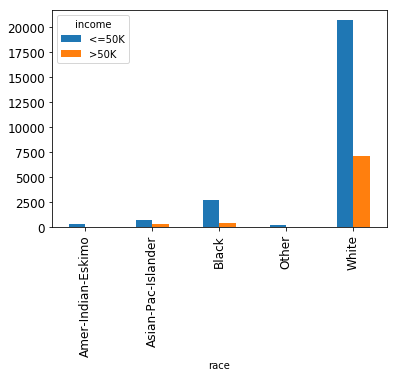

In [24]:
df.groupby(["income","race"]).size().unstack("income").plot(kind="bar",fontsize=12)


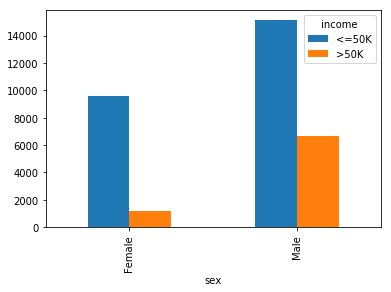

In [25]:
df.groupby(["income","sex"]).size().unstack("income").plot(kind="bar")


In [26]:
df.pivot_table(df, index=['income'], aggfunc=np.mean)

,age,capital.gain,capital.loss,education.num,fnlwgt,hours.per.week
income,,,,,,
<=50K,36.783738,148.752468,53.142921,9.595065,190340.86517,38.840210
>50K,44.249841,4006.142456,195.001530,11.611657,188005.00000,45.473026


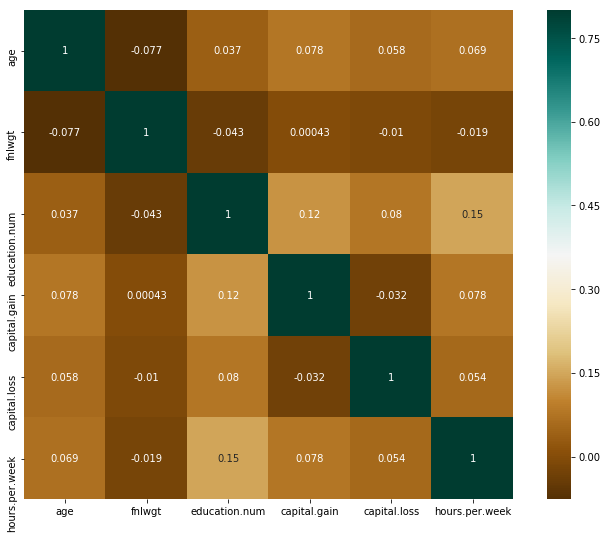

In [27]:
hmap = df.corr()
plt.subplots(figsize=(12, 9))
sns.heatmap(hmap, vmax=.8,annot=True,cmap="BrBG", square=True)

# Dropping variables

In [70]:
df=df.drop(columns='fnlwgt')#drops column:fnlwgt


# Modeling

In [71]:
X = df.drop(['income'], axis=1)
y = df['income']




categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex','native.country']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X[feature] = le.fit_transform(X[feature])
#         X_test[feature] = le.transform(X_test[feature])

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

C:\Users\harki\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\harki\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


In [45]:
X

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
1,82,2,132870,11,9,6,3,1,4,0,0,4356,18,38
3,54,2,140359,5,4,0,6,4,4,0,0,3900,40,38
4,41,2,264663,15,10,5,9,3,4,0,0,3900,40,38
5,34,2,216864,11,9,0,7,4,4,0,0,3770,45,38
6,38,2,150601,0,6,5,0,4,4,1,0,3770,40,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,2,310152,15,10,4,10,1,4,1,0,0,40,38
32557,27,2,257302,7,12,2,12,5,4,0,0,0,38,38
32558,40,2,154374,11,9,2,6,0,4,1,0,0,40,38
32559,58,2,151910,11,9,6,0,4,4,0,0,0,40,38


In [13]:
from sklearn.model_selection import train_test_split


# Train-test SVC Kernel

In [25]:
def svm_func(kernel,X_train,y_train,X_test,y_test):
    svc_linear=SVC(kernel= kernel) 
    svc_linear.fit(X_train,y_train)
    y_pred=svc_linear.predict(X_test)
    print('*************Results:SVM (kernel=',kernel,')*********************')
    print('Accuracy Score:',metrics.accuracy_score(y_test,y_pred))
    print('Train score :', metrics.accuracy_score(y_train,svc_linear.predict(X_train)))
    print('Confusion matrix:')
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))

In [26]:
svm_func('linear', X_train,y_train,X_test,y_test)

*************Results:SVM (kernel= linear )*********************
Accuracy Score: 0.811470880760305
Train score : 0.8105906313645621
Confusion matrix:
[[6599  162]
 [1544  744]]
              precision    recall  f1-score   support

           0       0.81      0.98      0.89      6761
           1       0.82      0.33      0.47      2288

   micro avg       0.81      0.81      0.81      9049
   macro avg       0.82      0.65      0.68      9049
weighted avg       0.81      0.81      0.78      9049



In [27]:
svm_func('poly', X_train,y_train,X_test,y_test)

C:\Users\harki\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


*************Results:SVM (kernel= poly )*********************
Accuracy Score: 0.8385456956569787
Train score : 0.8439350163406432
Confusion matrix:
[[6429  332]
 [1129 1159]]
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      6761
           1       0.78      0.51      0.61      2288

   micro avg       0.84      0.84      0.84      9049
   macro avg       0.81      0.73      0.76      9049
weighted avg       0.83      0.84      0.83      9049



In [28]:
svm_func('sigmoid', X_train,y_train,X_test,y_test)

C:\Users\harki\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


*************Results:SVM (kernel= sigmoid )*********************
Accuracy Score: 0.7553320808929164
Train score : 0.7556008146639511
Confusion matrix:
[[5698 1063]
 [1151 1137]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.84      6761
           1       0.52      0.50      0.51      2288

   micro avg       0.76      0.76      0.76      9049
   macro avg       0.67      0.67      0.67      9049
weighted avg       0.75      0.76      0.75      9049



In [29]:
svm_func('rbf', X_train,y_train,X_test,y_test)

C:\Users\harki\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


*************Results:SVM (kernel= rbf )*********************
Accuracy Score: 0.8446237153276606
Train score : 0.850802822905319
Confusion matrix:
[[6372  389]
 [1017 1271]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      6761
           1       0.77      0.56      0.64      2288

   micro avg       0.84      0.84      0.84      9049
   macro avg       0.81      0.75      0.77      9049
weighted avg       0.84      0.84      0.84      9049



# Learning curve 

In [30]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X_train, y_train, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
   
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    print('Cross Validation Score :',test_scores_mean)
    print('Training Score :',train_scores_mean)

    
#     estimator.fit(X_train,y_train)
#     y_pred=estimator.predict(X_test)
#     print('test score : ', y_pred)
#     print(metrics.accuracy_score(y_test,y_pred))
#     print("Train score:",train_scores_mean)
#     print("Train score:",test_scores_mean)
#     print(confusion_matrix(y_test,y_pred))
     
    return plt



Automatically created module for IPython interactive environment


Cross Validation Score : [0.81573015 0.81505056 0.8140063  0.81271341 0.81173545]
Training Score : [0.8185738  0.8139268  0.81399397 0.81211295 0.8104563 ]


<module 'matplotlib.pyplot' from 'C:\\Users\\harki\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

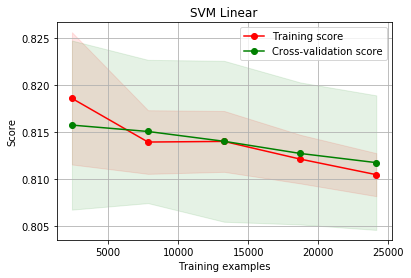

In [31]:
title = "SVM Linear"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = SVC(kernel='linear')
plot_learning_curve(estimator, title, X, y, ylim=None, cv=cv, n_jobs=4)

Cross Validation Score : [0.8123819  0.83122824 0.83547157 0.83810708 0.84019559]
Training Score : [0.84705638 0.84399949 0.84403165 0.84339804 0.84327573]


<module 'matplotlib.pyplot' from 'C:\\Users\\harki\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

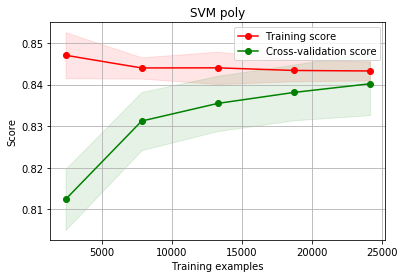

In [32]:
title = "SVM poly"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = SVC(kernel='poly')
plot_learning_curve(estimator, title, X, y, ylim=None, cv=cv, n_jobs=4)

Cross Validation Score : [0.76673297 0.75517984 0.75353887 0.75392011 0.75257749]
Training Score : [0.75497512 0.75253156 0.75338357 0.75369806 0.7526379 ]


<module 'matplotlib.pyplot' from 'C:\\Users\\harki\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

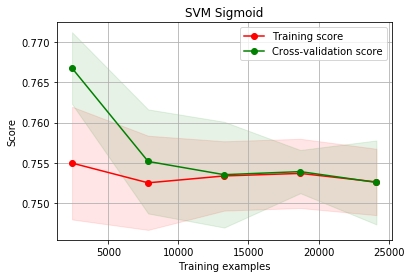

In [33]:
title = "SVM Sigmoid"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = SVC(kernel='sigmoid')
plot_learning_curve(estimator, title, X, y, ylim=None, cv=cv, n_jobs=4)

Cross Validation Score : [0.83492458 0.84266534 0.84394165 0.84480358 0.84515167]
Training Score : [0.85986733 0.85435531 0.85232856 0.85173539 0.85124539]


<module 'matplotlib.pyplot' from 'C:\\Users\\harki\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

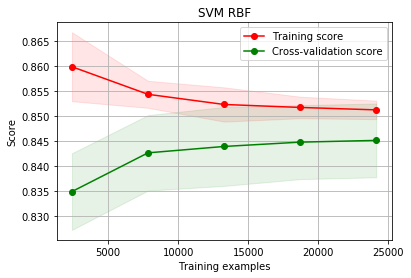

In [34]:
title = "SVM RBF"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = SVC()
plot_learning_curve(estimator, title, X, y, ylim=None, cv=cv, n_jobs=4)

# Decision Trees

In [17]:
X_train, X_test, y_train, y_test = train_test_split(  
    X, y, test_size = 0.3, random_state = 100) 

In [55]:
def train_using_diff_criterion(criterion,X_train, X_test, y_train,y_test): 
    clf_gini = DecisionTreeClassifier(criterion = criterion, 
            random_state = 100,max_depth=20, min_samples_leaf=5) 
    model=clf_gini.fit(X_train, y_train) 
    y_pred=model.predict(X_test)
    print("Confusion Matrix: ", 
        confusion_matrix(y_test, y_pred)) 
    print('Train score :', metrics.accuracy_score(y_train,model.predict(X_train)))
      
    print ("Test Scores : ", 
    accuracy_score(y_test,y_pred)*100) 
      
    print("Report : ", 
    classification_report(y_test, y_pred))

In [56]:
train_using_diff_criterion("gini",X_train, X_test, y_train,y_test)

Confusion Matrix:  [[6150  611]
 [ 909 1379]]
Train score : 0.9072135651020699
Test Scores :  83.20256381920655
Report :                precision    recall  f1-score   support

           0       0.87      0.91      0.89      6761
           1       0.69      0.60      0.64      2288

   micro avg       0.83      0.83      0.83      9049
   macro avg       0.78      0.76      0.77      9049
weighted avg       0.83      0.83      0.83      9049



# Learning Curve

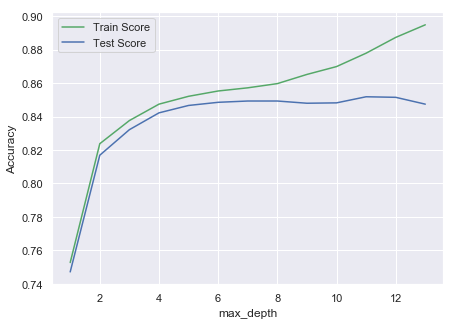

In [52]:
sns.set(rc={'figure.figsize':(7,5)})

train_score_array = []
test_score_array = []

for n in range(1,14):
    dtree = DecisionTreeClassifier(criterion = "gini", max_depth=n)
    dtree.fit(X_train, y_train)
    train_score_array.append(dtree.score(X_train, y_train))
    test_score_array.append(dtree.score(X_test, y_test))
    
x_axis = range(1,14)
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.legend()

In [60]:
train_using_diff_criterion("entropy",X_train, X_test, y_train,y_test)

Confusion Matrix:  [[6059  702]
 [ 870 1418]]
Train score : 0.9060768247051579
Test Scores :  82.62791468670572
Report :                precision    recall  f1-score   support

           0       0.87      0.90      0.89      6761
           1       0.67      0.62      0.64      2288

   micro avg       0.83      0.83      0.83      9049
   macro avg       0.77      0.76      0.76      9049
weighted avg       0.82      0.83      0.82      9049



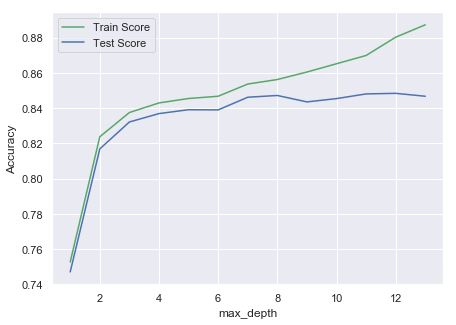

In [53]:
sns.set(rc={'figure.figsize':(7,5)})

train_score_array = []
test_score_array = []

for n in range(1,14):
    dtree = DecisionTreeClassifier(criterion = "entropy", max_depth=n)
    dtree.fit(X_train, y_train)
    train_score_array.append(dtree.score(X_train, y_train))
    test_score_array.append(dtree.score(X_test, y_test))
    
x_axis = range(1,14)
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.legend()

Cross Validation Score : [0.79532571 0.80989557 0.81329355 0.81629372 0.81999005]
Training Score : [0.99481758 0.97442928 0.96608892 0.96049521 0.95331344]


<module 'matplotlib.pyplot' from 'C:\\Users\\harki\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

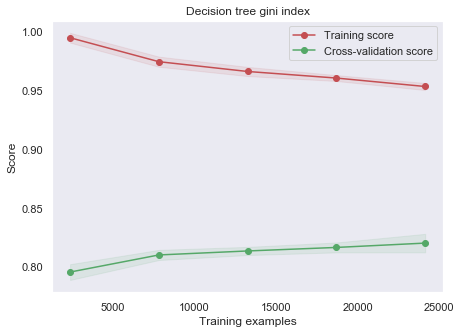

In [32]:
title = "Decision tree gini index"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = DecisionTreeClassifier(criterion = "gini", max_depth=14)
plot_learning_curve(estimator, title, X, y, ylim=None, cv=cv, n_jobs=4)

Cross Validation Score : [0.82161445 0.84001326 0.84584784 0.84719045 0.84820156]
Training Score : [0.91310116 0.88169876 0.87457423 0.87020162 0.86812549]


<module 'matplotlib.pylab' from 'C:\\Users\\harki\\Anaconda3\\lib\\site-packages\\matplotlib\\pylab.py'>

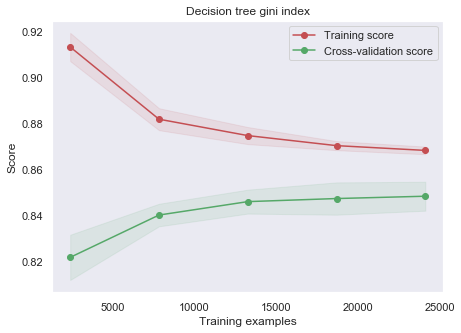

In [57]:
title = "Decision tree gini index"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = DecisionTreeClassifier(criterion = "gini", max_depth=10)
plot_learning_curve(estimator, title, X, y, ylim=None, cv=cv, n_jobs=4)

In [61]:
x=[0.82368639, 0.84041107, 0.84654401, 0.84845019, 0.84845019]
np.mean(x)

0.84150837

Cross Validation Score : [0.82368639 0.84041107 0.84654401 0.84845019 0.84845019]
Training Score : [0.90037313 0.87493942 0.86883949 0.8664474  0.86395624]


<module 'matplotlib.pylab' from 'C:\\Users\\harki\\Anaconda3\\lib\\site-packages\\matplotlib\\pylab.py'>

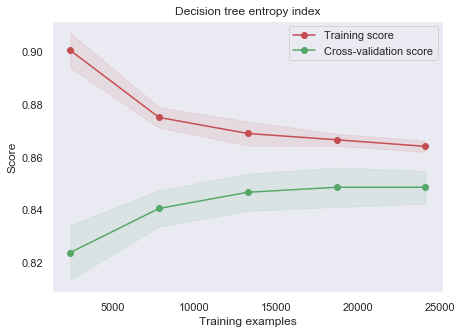

In [59]:
title = "Decision tree entropy index"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = DecisionTreeClassifier(criterion = "entropy", max_depth=10)
plot_learning_curve(estimator, title, X, y, ylim=None, cv=cv, n_jobs=4)

# Boosting

In [35]:
import matplotlib.pylab as plt


In [65]:
def cal_gbm(X_train,y_train,X_test,y_test):
    model=GradientBoostingClassifier(max_depth=10, learning_rate= 0.3,random_state=123 )
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    score=metrics.accuracy_score(y_test,y_pred)
    predictors=X_train.columns
    feat_imp = pd.Series(model.feature_importances_, predictors).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')
    print('Train score :', metrics.accuracy_score(y_train,model.predict(X_train)))
    print('Test score:',score)
    print('Confusion matrix:')
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))


In [39]:
X

array([[ 3.31662977, -0.20895464,  0.17476277, ..., 10.55581365,
        -1.91416096,  0.26492394],
       [ 1.18483085, -0.20895464, -1.39911971, ...,  9.42791507,
        -0.07773411,  0.26492394],
       [ 0.19506706, -0.20895464,  1.22401776, ...,  9.42791507,
        -0.07773411,  0.26492394],
       ...,
       [ 0.11893139, -0.20895464,  0.17476277, ..., -0.21858598,
        -0.07773411,  0.26492394],
       [ 1.48937355, -0.20895464,  0.17476277, ..., -0.21858598,
        -0.07773411,  0.26492394],
       [-1.25151078, -0.20895464,  0.17476277, ..., -0.21858598,
        -1.74721307,  0.26492394]])

Train score : 0.9772651920617629
Test score: 0.8427450547021771
Confusion matrix:
[[6151  610]
 [ 813 1475]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.90      6761
           1       0.71      0.64      0.67      2288

   micro avg       0.84      0.84      0.84      9049
   macro avg       0.80      0.78      0.79      9049
weighted avg       0.84      0.84      0.84      9049



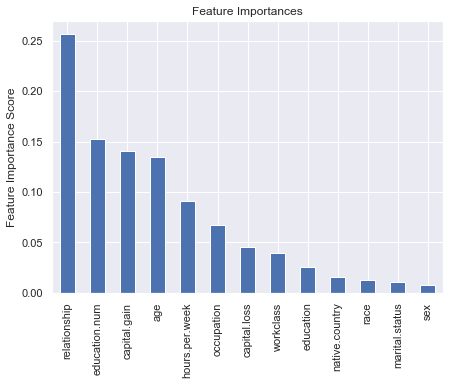

In [73]:
cal_gbm(X_train,y_train,X_test, y_test)

Cross Validation Score : [0.83944969 0.84828444 0.85126803 0.85380408 0.85436764]
Training Score : [1.         1.         1.         0.99982352 0.99870695]


<module 'matplotlib.pylab' from 'C:\\Users\\harki\\Anaconda3\\lib\\site-packages\\matplotlib\\pylab.py'>

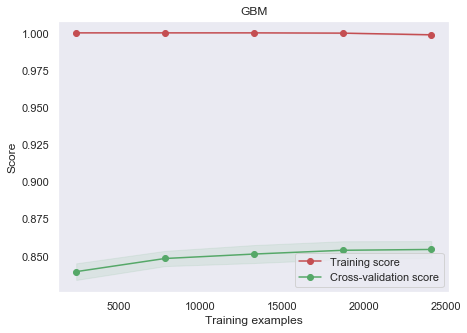

In [62]:
title = "GBM"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = GradientBoostingClassifier(max_depth=10, learning_rate= 0.3,random_state=123 )
plot_learning_curve(estimator, title, X, y, ylim=None, cv=cv, n_jobs=4)

In [74]:
y=[0.83944969, 0.84828444, 0.85126803, 0.85380408, 0.85436764]
np.mean(y)

0.8494347760000001

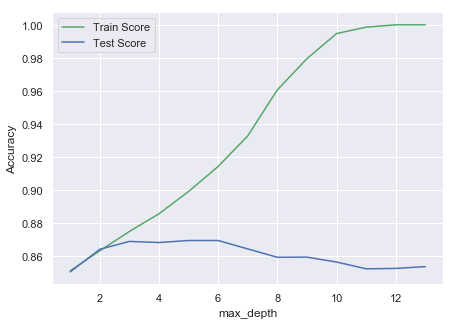

In [54]:
sns.set(rc={'figure.figsize':(7,5)})

train_score_array = []
test_score_array = []

for n in range(1,14):
    dtree = GradientBoostingClassifier(max_depth=n, learning_rate= 0.2,random_state=123 )
    dtree.fit(X_train, y_train)
    train_score_array.append(dtree.score(X_train, y_train))
    test_score_array.append(dtree.score(X_test, y_test))
    
x_axis = range(1,14)
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.legend()

In [50]:
X_train.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country'],
      dtype='object')